<a href="https://colab.research.google.com/github/jchen8000/MLDLwithPython/blob/main/4_01_Linear_Regression/Linear_Regression_Algorithm_Implementation_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Algorithm and Implementation, Part 1

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

## Algorithm for Single Variable

### Hypothesis Function for Single Variable


The purpose of linear regression is to find a hypothesis function that can best fit all data.

Here consider there is only one input variable $x$, the hypothesis function for linear regression is:

$h_\theta(x) = \theta_1 x + \theta_0 $

$\theta_1 $ is called coefficient and $\theta_0$ is called bias or intercept. $x$ is the independent variable. We will discuss the multiple input variables later.

The linear regression is to find $\theta_1$ and $\theta_0$ and decide the hypothesis function based on a dataset of $x$ and $y$. And in the future the hypothesis function can be used to make predictions based on input data of $x$. 



In [2]:
def hypothesis(x, theta_1, theta_0):
  y = theta_1 * X + theta_0
  return(y)

### Least Square Method

Then how to decide the hypothesis will “best fit” the data? 
Least Squares Method is a mathematical method used to decide the best fit of a hypothesis function by minimizing the errors, or distances from each point to the function.

In most cases a data point might not just in the line, there is a distance to the line. The distance from a data point to the hypothesis line is the error of that data point. The error is shown in a vertical dashed line from the data point itself to the hypothesis line in below figure,

Some data points are above the hypothesis line, which errors are positive; some are below the line which errors are negative. So the errors are squared sum up for all data points, therefore it doesn't matter an error is positive or negative. The line with minimum value of the sum of square of errors is the best fit.

/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


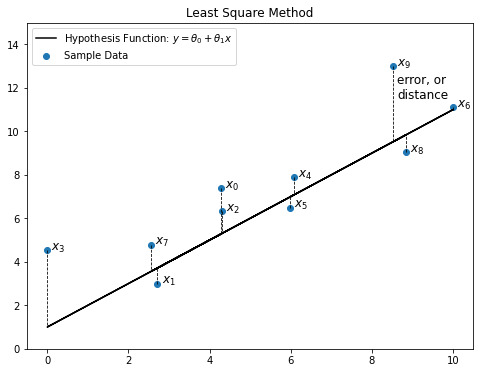

In [3]:
# Generate sample data
X, y = datasets.make_regression(n_samples=10,    #number of samples
                                n_features=1,     #number of features
                                noise=50,         #bias and standard deviation of the guassian noise
                                random_state=0)   #set for same data points for each run

# Scale feature x from 0 to 20, and y from 0 to 100
bias = 3.0
X = np.interp(X, (X.min(), X.max()), (0, 10))
y = np.interp(y, (y.min(), y.max()), (0, 10))
y = y + bias
theta_1, theta_0 = 1, 1
y_pred = hypothesis(X, theta_1, theta_0)
fig = plt.figure(figsize=(8,6))
plt.ylim(0, 15)
plt.scatter(X, y, label='Sample Data')
plt.plot(X, y_pred, color='k', label=r'Hypothesis Function: $y = \theta_0 + \theta_1x$')
for i in range(len(X)):
  plt.plot([X[i], X[i]], [y[i], y_pred[i]], color="k", linestyle='--', linewidth=0.8)
  plt.text(X[i]+0.1, y[i], r'$x_%d$'%i, fontsize=12)
plt.text(X[9]+0.1, y[9]-1.5, 'error, or\ndistance', fontsize=12)

plt.title('Least Square Method')
plt.legend(loc='upper left')
plt.savefig("least_square_method.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()

### Generate sample data

In [4]:
# Generate sample data
X, y = datasets.make_regression(n_samples=100,    #number of samples
                                n_features=1,     #number of features
                                noise=10,         #bias and standard deviation of the guassian noise
                                random_state=0)   #set for same data points for each run
intercept = 3.0
X = np.interp(X, (X.min(), X.max()), (0, 10))
y = np.interp(y, (y.min(), y.max()), (0, 10))
y = y + intercept

### Cost Function

Cost function is to calculate the errors, the result is a scalar value. The cost function for linear regression is called Mean Squared Error(MSE), defined as:

$ \qquad\qquad J = \displaystyle\frac{\mathrm{1} }{n}  \sum_{i=1}^{n} (y_i - \hat{y_i} )^2$

where:

$n$ is the number of sample data, $i$ is the $i$-th sample data. $y$ is the true value of the sample data, $\hat{y_i}$ is the predicted value using the Hypothesis Function, $\hat{y_i} = h_\theta(x) = \theta_1 x_i + \theta_0$

Then the cost function is:

$ \qquad\qquad J = \displaystyle\frac{\mathrm{1} }{n}  \sum_{i=1}^{n} (y_i - (\theta_1 x_i + \theta_0) )^2$


In [5]:
def cost(X, y, theta_1, theta_0):
  y_pred = hypothesis(X, theta_1, theta_0)
  # return np.square(np.subtract(y, y_pred) ).mean()
  sum = 0
  n = len(y)
  for i in range (0,n): 
    distance = y[i] - y_pred[i]
    squared_distance = distance**2 
    sum = sum + squared_distance
  return(sum/n)

theta_1, theta_0 = 1.2, 1
print( cost(X, y, theta_1, theta_0) )

[1.50792978]


Compare the result with *sklearn.metrics.mean_squared_error()* function with a random selected $\theta_0$ and $\theta_1$

In [6]:
y_pred = hypothesis(X, theta_1, theta_0)
mse = mean_squared_error(y, y_pred )
print( mse )

1.5079297801064113


The purpose of linear regression is to find a line $y = \theta_0 + \theta_1 x$ with the minimum cost. 

In another word, to find $\theta_0$ and $\theta_1$ so that the below cost function has minimum value.

$ \qquad\qquad J = \displaystyle\frac{\mathrm{1} }{n}  \sum_{i=1}^{n} (y_i - (\theta_1 x_i + \theta_0) )^2$

Visulize the MSE cost function vs $\theta_1$:

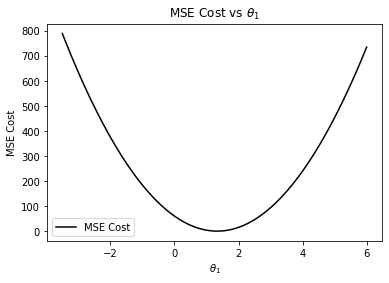

In [7]:
theta_0 = 1
theta_1 = np.linspace(-3.5, 6, 100)
mse_cost = []
for i in range(len(theta_1)):
  j = cost(X, y, theta_1[i], theta_0 )
  mse_cost.append(j)

fig = plt.figure(figsize=(6,4))
plt.plot(theta_1, mse_cost, color='k', label='MSE Cost')
plt.xlabel(r'$\theta_1$')
plt.ylabel('MSE Cost')
plt.legend(loc='lower left')
plt.title(r'MSE Cost vs $\theta_1$')
plt.savefig("linear_regression_gradient_decent1.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()

Visulize the MSE cost function vs $\theta_0$ :

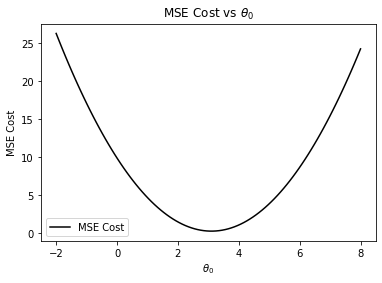

In [8]:
theta_1 = 1
theta_0 = np.linspace(-2, 8, 100)
mse_cost = []
for i in range(len(theta_0)):
  j = cost(X, y, theta_1, theta_0[i] )
  mse_cost.append(j)

fig = plt.figure(figsize=(6,4))
plt.plot(theta_0, mse_cost, color='k', label='MSE Cost')
plt.xlabel(r'$\theta_0$')
plt.ylabel('MSE Cost')
plt.legend(loc='lower left')
plt.title(r'MSE Cost vs $\theta_0$')
plt.savefig("linear_regression_gradient_decent2.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()

### Gradient Descent

**Gradient Descent** is used to find the minimum value of MSE cost:

Partial derivative for $\theta_1$:

$ \displaystyle\frac{\partial J}{\partial \theta_1} = \frac{\mathrm{2} }{n}  \sum_{i=1}^{n} ( h(x_i) - y_i ) x_i $

Partial derivative for $\theta_0$:

$ \displaystyle\frac{\partial J}{\partial \theta_0} = \frac{\mathrm{2} }{n}  \sum_{i=1}^{n} ( h(x_i) - y_i ) $ 

## Implementation for Single Variable

In [9]:
class LinearRegression_SingleFeature:
    def __init__(self, X , y):
        self.X = np.hstack(X)
        self.y = y
        self.theta_1 = 0
        self.theta_0 = 0
        self.theta_1_history = []
        self.theta_0_history = []
        self.epoch_history = []
        self.cost_history = []

    def predict(self, X):
        return (self.theta_1 * X + self.theta_0)

    def fit(self, epochs, alpha):
        #Gradient Descent process
        for i in range(epochs):
            self.epoch_history.append(i)
            self.theta_1_history.append(self.theta_1)
            self.theta_0_history.append(self.theta_0)
            self.cost_history.append(self.cost())
            y_pred = self.predict(self.X)
            n = len(self.X) 

            #Gradient of theta_1 and theta_0
            grad_theta_1 = (2/n)*sum( self.X * (y_pred - self.y) )
            grad_theta_0 = (2/n)*sum(y_pred - self.y )
              
            #Apply gradient decent rules
            self.theta_1 = self.theta_1 - alpha * grad_theta_1
            self.theta_0 = self.theta_0 - alpha * grad_theta_0
             
    def cost(self):
        y_pred = self.predict(self.X)
        sum = 0
        n = len(self.X)
        for i in range (n): 
          distance = self.y[i] - y_pred[i]
          squared_distance = distance**2 
          sum = sum + squared_distance
        return(sum/n)

    def score(self):
        y_pred = self.predict(self.X)
        y_mean = np.mean(self.y)
        u, v = 0, 0
        for i in range (len(self.y)): 
            u = u + (self.y[i] - y_pred[i])**2
            v = v + (self.y[i] - y_mean)**2
        return( 1 - (u/v))


In [10]:
lrsf = LinearRegression_SingleFeature(X,y)
lrsf.fit(20000 , 0.002)
print("theta_1 =", lrsf.theta_1)
print("theta_0 =", lrsf.theta_0)
print("cost =", lrsf.cost())
print("score =", lrsf.score())

theta_1 = 0.9796564563102947
theta_0 = 3.2118151850339762
cost = 0.2593486896016992
score = 0.9417294723385957


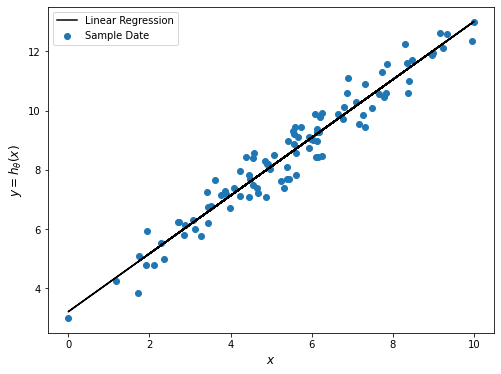

In [11]:
y_pred = lrsf.predict(X)
plt.figure(figsize = (8,6))
plt.scatter(X, y, label="Sample Date")
plt.plot(X , y_pred , color = 'k', label="Linear Regression")
plt.xlabel(r'$x$', fontsize=12)
plt.ylabel(r'$y=h_\theta(x)$', fontsize=12)
plt.legend(loc='best')
plt.savefig("linear_regression_gradient_decent4.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()

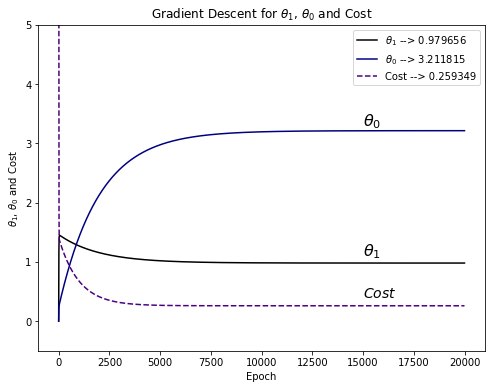

In [12]:
fig = plt.figure(figsize=(8,6))
plt.title(r'Gradient Descent for $\theta_1$, $\theta_0$ and Cost')
plt.ylim(-0.5, 5.0)
plt.plot(lrsf.epoch_history, lrsf.theta_1_history, color='black', label=r"$\theta_1$ --> %f"%lrsf.theta_1)
plt.plot(lrsf.epoch_history, lrsf.theta_0_history, color='navy', label=r"$\theta_0$ --> %f"%lrsf.theta_0)
plt.plot(lrsf.epoch_history, lrsf.cost_history, color='indigo', ls='--', label=r"Cost --> %f"%lrsf.cost_history[-1])
plt.text(15000, 3.3, r'$\theta_0$', fontsize=16, c='k')
plt.text(15000, 1.1, r'$\theta_1$', fontsize=16, c='k')
plt.text(15000, 0.4, r'$Cost$', fontsize=14, c='k')
# plt.grid(which='major', color='#555555', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel(r"$\theta_1$, $\theta_0$ and Cost" )
plt.legend(loc='best')
# plt.savefig("gradient_decent4.svg", format="svg", transparent=True, bbox_inches='tight')
plt.savefig("linear_regression_gradient_decent3.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()

Compare with sklearn.linear_model.LinearRegressionLinearRegression.

In [13]:
model = LinearRegression(fit_intercept=True)
model.fit(X, y)
print("coef_ =", model.coef_)
print("intercept_ =", model.intercept_)
print("cost =", mean_squared_error(y, model.predict(X)) )
print("score =", model.score(X, y, sample_weight=None))


coef_ = [0.9796368]
intercept_ = 3.2119370881393365
cost = 0.25934868767668634
score = 0.9417294727711081
